In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

df = pd.read_csv("Hitters.csv").iloc[:, 1:]
# get numeric variables only
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df = df.select_dtypes(include=numerics)

In [8]:
# remove null values
df = df[~df['Salary'].isnull()]

In [9]:
df.shape

(263, 17)

In [10]:
# check null values
df.isnull().sum()

AtBat      0
Hits       0
HmRun      0
Runs       0
RBI        0
Walks      0
Years      0
CAtBat     0
CHits      0
CHmRun     0
CRuns      0
CRBI       0
CWalks     0
PutOuts    0
Assists    0
Errors     0
Salary     0
dtype: int64

In [11]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


## Q1.1

Text(0, 0.5, 'weights')

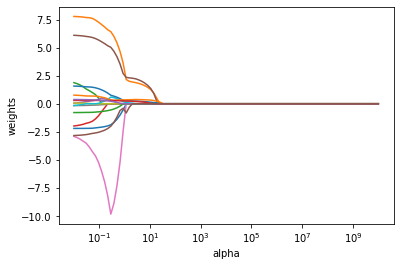

In [12]:
X = df.drop(['Salary'], axis = 1)
y = df['Salary'].values.reshape(-1, 1)

alphas = 10**np.linspace(10,-2,100)*0.5

lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [13]:
lasso.set_params(alpha=10)
lasso.fit(X, y)
coefs.append(lasso.coef_)
pd.Series(lasso.coef_, index=X.columns)

AtBat      0.000000
Hits       0.329475
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.076322
CRBI       0.204475
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64

In the coefficient trajectories plot, coefficients depend on the choice of tuning parameter. As tuning parameter alpha increases, some of the coefficients are exactly equal to zero. When alpha is 10, only Hits, CRBI, and CRuns left. 

Next, I perform 10-fold cross-validation to choose the best alpha.

In [14]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X, y)
lassocv.alpha_
print("The best alpha is {}.".format(lassocv.alpha_))

/Users/zihe/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The best alpha is 0.0635481759985745.


In [15]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X, y)
pd.Series(lasso.coef_, index=X.columns)

AtBat     -2.082954
Hits       7.041011
HmRun      0.000000
Runs      -0.682615
RBI        0.496552
Walks      5.511781
Years     -6.107625
CAtBat    -0.087066
CHits      0.000000
CHmRun     0.156468
CRuns      1.228061
CRBI       0.583821
CWalks    -0.690601
PutOuts    0.292694
Assists    0.304372
Errors    -2.450795
dtype: float64

With the optimal value of the regularization penality, there are 14 predictors are left in that model.

## Q1.2

Text(0, 0.5, 'weights')

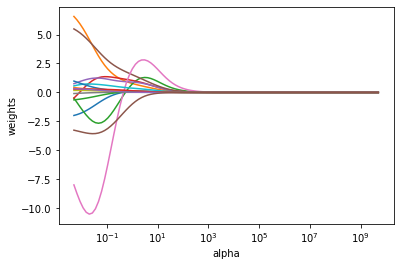

In [20]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_[0])

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [48]:
ridge.set_params(alpha = 500)
ridge.fit(X, y)
coefs.append(ridge.coef_[0])
pd.Series(ridge.coef_[0], index=X.columns)

AtBat      0.002384
Hits       0.008662
HmRun      0.034793
Runs       0.014639
RBI        0.015449
Walks      0.018207
Years      0.074184
CAtBat     0.000205
CHits      0.000753
CHmRun     0.005678
CRuns      0.001511
CRBI       0.001559
CWalks     0.001648
PutOuts    0.000961
Assists    0.000157
Errors    -0.000754
dtype: float64

In the coefficient trajectories plot, coefficients depend on the choice of tuning parameter. As tuning parameter alpha increases, these coefficients are decreasing but not zero. 

When alpha is 500, as expected, none of the coefficients are exactly zero - ridge regression does not perform variable selection. HmRun, Runs, RBI, Walks and Years are the most significant predictors. 

Next, I perform 10-fold cross-validation to choose the best alpha.

In [35]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X, y)
ridgecv.alpha_
print("The best alpha is {}.".format(lassocv.alpha_))

The best alpha is 0.0635481759985745.


In [37]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X, y)
pd.Series(ridge4.coef_[0], index = X.columns)

AtBat     -1.703060
Hits       5.499234
HmRun     -1.615805
Runs       0.322006
RBI        1.037596
Walks      4.917793
Years     -9.964652
CAtBat    -0.053574
CHits      0.175139
CHmRun     0.709761
CRuns      0.708315
CRBI       0.336638
CWalks    -0.535692
PutOuts    0.288851
Assists    0.291165
Errors    -3.444208
dtype: float64

With the optimal value of the regularization penality, all the 16 predictors are kept in that model.

## Q2

We now split the samples into a training set and a test set in order to estimate the test error of ridge regression and the lasso:

In [39]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

Next I fit a ridge regression model on the training set, and evaluate its MSE on the test set, using  λ = 10 and $10^{10}$ :

In [ ]:
ridge2 = Ridge(alpha = 10, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
# print(pd.Series(ridge2.coef_[0], index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))          # Calculate the test MSE

In [ ]:
ridge3 = Ridge(alpha = 10**10, normalize = True)
ridge3.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test)           # Use this model to predict the test data
# print(pd.Series(ridge3.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred3))          # Calculate the test MSE

When setting alpha as $10^{10}$, this big penalty shrinks the coefficients to a very large degree, essentially reducing to a model containing just the intercept. This makes the variance of the model smaller.

I noticed that fitting a ridge regression model with alpha = 10 leads to a much lower test MSE than fitting a model with just an intercept. It shows this over-shrinking makes the model more biased, resulting in a higher MSE.

Next I fit the lasso regression model and could get the same conclusion. 

In [58]:
lasso = Lasso(max_iter = 10000, normalize = True, alpha = 10)
lasso.fit(X_train, y_train)
pred = lasso.predict(X_test)           
# pd.Series(lasso.coef_, index=X.columns)
print(mean_squared_error(y_test, pred)) 

122504.55491985269


In [59]:
lasso = Lasso(max_iter = 10000, normalize = True, alpha = 10**10)
lasso.fit(X_train, y_train)
pred = lasso.predict(X_test)           
print(mean_squared_error(y_test, pred))   

172752.20623984456
